<a href="https://www.kaggle.com/code/anujotsingh/car-price-prediction?scriptVersionId=260526317" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ford-car-price-prediction/ford.csv


# Data Loading

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/ford-car-price-prediction/ford.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.shape

(17966, 9)

In [5]:
#basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [6]:
#statistical knowledge
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


# *Problems:*
* Future Year (2060)
* Too high mpg (201.8)
* engineSize (0)

In [7]:
#checking null values
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

# EDA

In [8]:
#checking for cars with future years
df[df['year'] > 2025]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [9]:
#just a single record so can be dropped
#dropping false record
df = df[df['year'] <= 2025]

In [10]:
df.shape

(17965, 9)

In [11]:
#checking for records with unrealistic too high mpg
df[df['mpg']>100]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6153,Kuga,2020,31000,Semi-Auto,10,Hybrid,135,201.8,2.5
6536,Kuga,2020,31991,Semi-Auto,2357,Hybrid,135,201.8,2.5
9220,Kuga,2020,32000,Automatic,10,Hybrid,140,201.8,2.5
12862,Kuga,2020,33500,Automatic,5534,Hybrid,140,201.8,2.5
13730,Kuga,2020,32995,Automatic,11,Hybrid,135,201.8,2.5


In [12]:
# Imputed realistic MPG for Ford Kuga 2020 Hybrid 2.5L
# Source: https://www.ford.co.uk/cars/kuga/specs
df.loc[df['mpg']>100,'mpg'] = 49.7

In [13]:
#rechecking for any unrealistic value and proper imputation
df[df['mpg']>100]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [14]:
#checking for records with engineSize -> 0
df[df['engineSize'] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13862,Kuga,2019,18990,Manual,8389,Petrol,150,35.3,0.0
14064,Focus,2016,15500,Manual,28344,Diesel,20,67.3,0.0
14082,Focus,2015,14300,Manual,40457,Diesel,20,67.3,0.0
15343,KA,2018,10000,Manual,10051,Petrol,150,43.5,0.0
15500,EcoSport,2015,8500,Manual,33403,Diesel,30,61.4,0.0
15775,Focus,2017,13000,Manual,24484,Diesel,145,70.6,0.0
16312,Focus,2015,9170,Manual,28000,Petrol,20,61.4,0.0
16313,Focus,2019,18699,Manual,10000,Petrol,145,46.3,0.0
16321,Fiesta,2017,9899,Manual,10000,Petrol,0,65.7,0.0
16322,Ka+,2018,9999,Manual,15000,Petrol,145,43.5,0.0


In [15]:
#many records so need imputation
#replacing 0 -> nan
df['engineSize'] = df['engineSize'].replace(0,np.nan)
df.isnull().sum()

model            0
year             0
price            0
transmission     0
mileage          0
fuelType         0
tax              0
mpg              0
engineSize      51
dtype: int64

In [16]:
#checking median engineSize per model per fueltype
median_engineSizes = df.groupby(['model','fuelType'])['engineSize'].median().reset_index()
median_engineSizes

,model,fuelType,engineSize
0,B-MAX,Diesel,1.5
1,B-MAX,Petrol,1.0
2,C-MAX,Diesel,1.5
3,C-MAX,Petrol,1.0
4,EcoSport,Diesel,1.5
5,EcoSport,Petrol,1.0
6,Edge,Diesel,2.0
7,Escort,Petrol,1.8
8,Fiesta,Diesel,1.5
9,Fiesta,Petrol,1.0


In [17]:
median_engineSizes.rename(columns={'engineSize': 'median_engineSize'}, inplace=True)

#merging this df to original df
df = df.merge(median_engineSizes, on=['model', 'fuelType'], how='left')

#imputing null values
df['engineSize'] = df['engineSize'].fillna(df['median_engineSize'])

#dropping helper column
df.drop(columns='median_engineSize', inplace=True)

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [18]:
#checking for any remaing null value or inconsistency in engineSize
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      1
dtype: int64

In [19]:
df[df['engineSize'].isnull()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16371,Puma,2019,23999,Manual,3000,Hybrid,150,50.4,NaN


In [20]:
# Impute engineSize for 2019 Ford Puma Hybrid with Realistic value 
df['engineSize'] = df['engineSize'].fillna(1.0)

In [21]:
#final check for inconsistency
df[df['engineSize'].isnull()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [22]:
#final check for inconsistency
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [23]:
def distplot(col,num):
    plt.subplot(3,2,num)
    sns.histplot(data = df,x = col,kde = True)
    plt.title(f'{col}')
    plt.tight_layout()

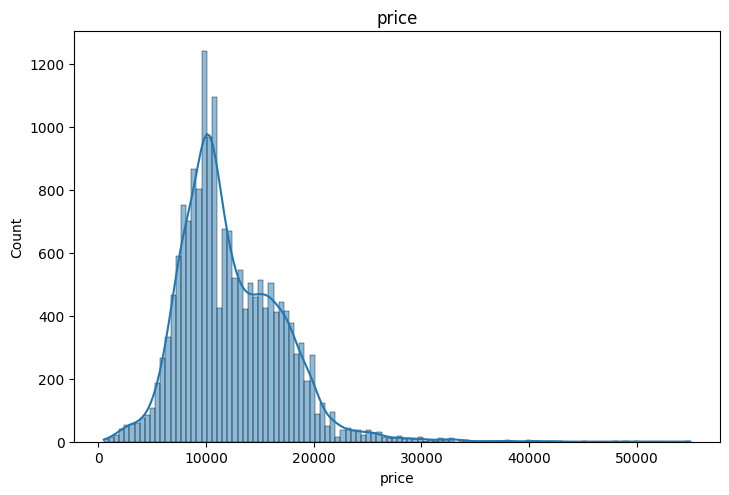

In [24]:
plt.figure(figsize=(14,14))
distplot('price',1)
plt.show()

price -> right skewed

<Axes: >

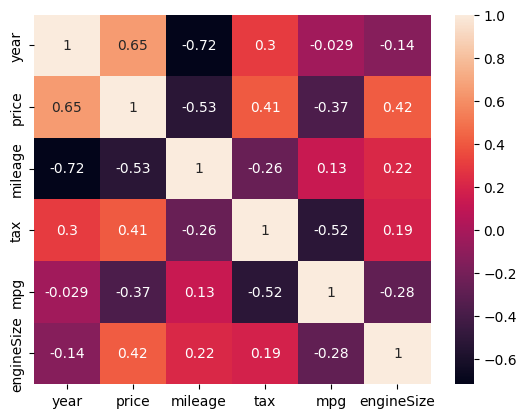

In [25]:
#heatmap to check correlation between numeric cols and price
sns.heatmap(df.corr(numeric_only = True),annot=True)

In [26]:
#selecting numeric features 
numeric_features = df.select_dtypes(include='number').columns.to_list()
numeric_features.remove('price')
numeric_features

['year', 'mileage', 'tax', 'mpg', 'engineSize']

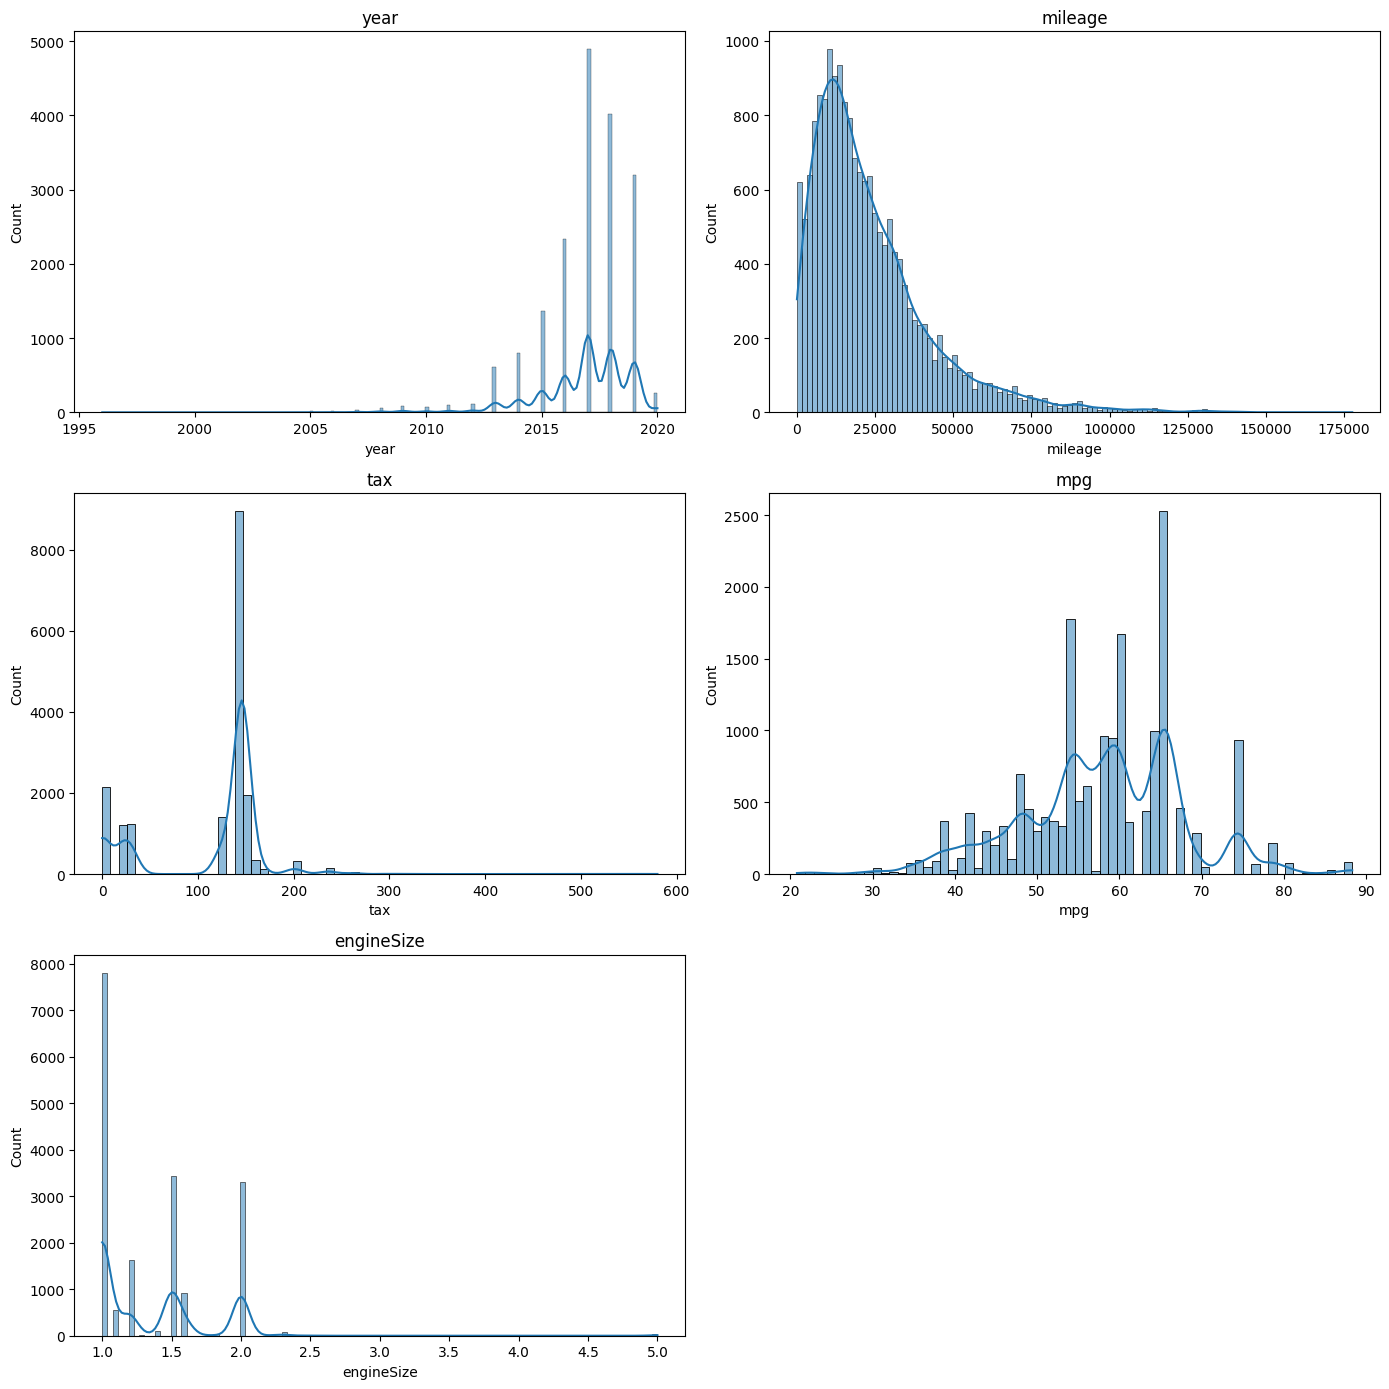

In [27]:
#plotting distribution for all numeric features
plt.figure(figsize=(14,14))
for i,col in enumerate(numeric_features):
    distplot(col,i+1)

plt.show()

In [28]:
#function for plotting countplot
def countplot(col,num):
    plt.subplot(3,2,num)
    sns.countplot(data = df,x = col)
    plt.title(f'{col}')
    plt.xticks(rotation = 90)
    plt.tight_layout()

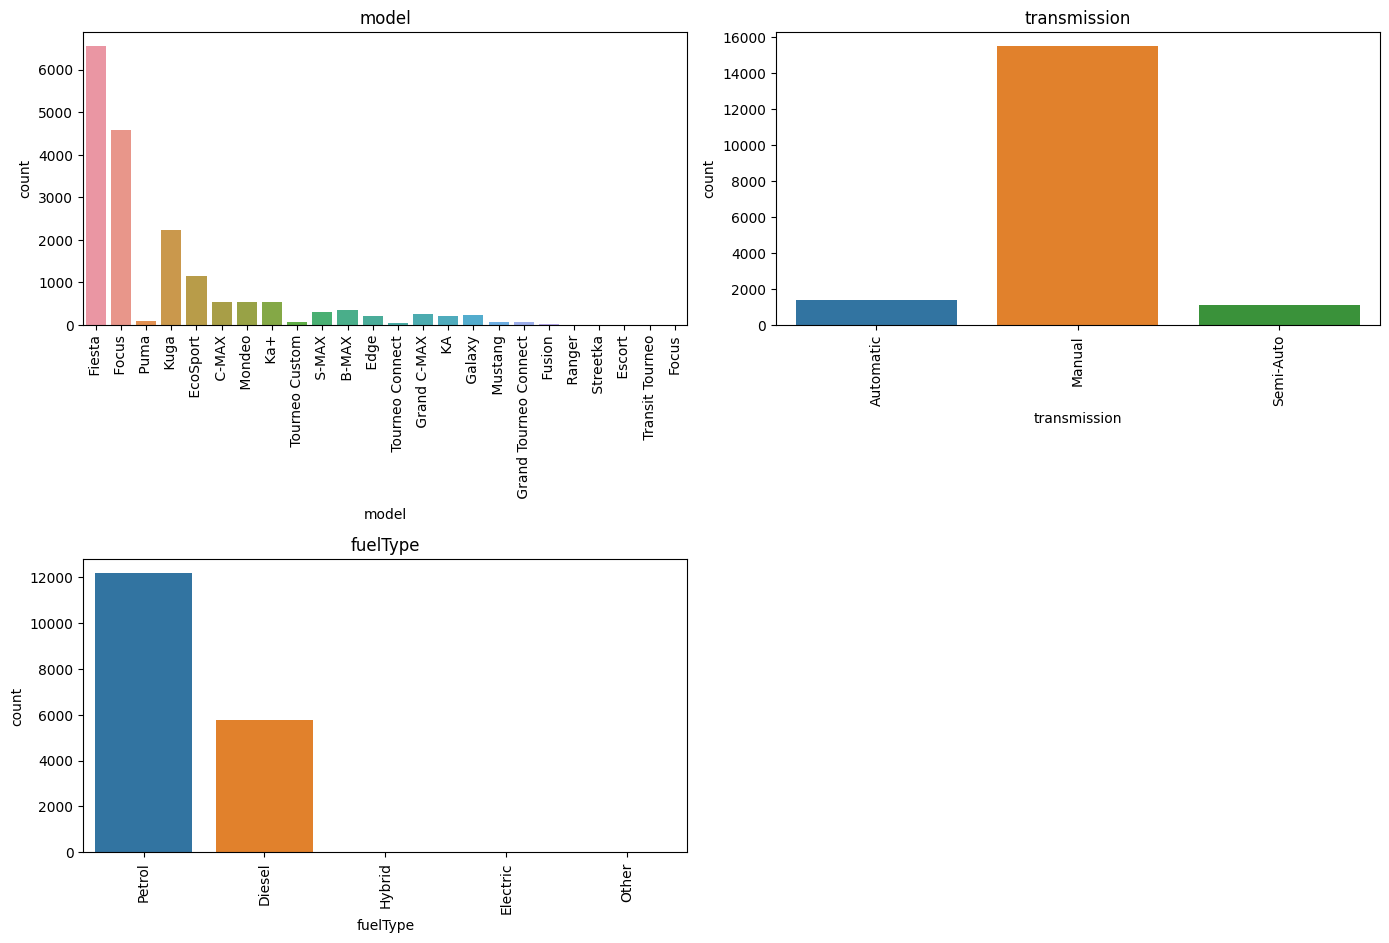

In [29]:
cat_features = ['model','transmission','fuelType']
#plotting countplot for all categorical features
plt.figure(figsize=(14,14))
for i,col in enumerate(cat_features):
    countplot(col,i+1)

plt.show()

In [30]:
#checking for imbalance in transmission
df['transmission'].value_counts(normalize=True)


transmission
Manual       0.863791
Automatic    0.075703
Semi-Auto    0.060507
Name: proportion, dtype: float64

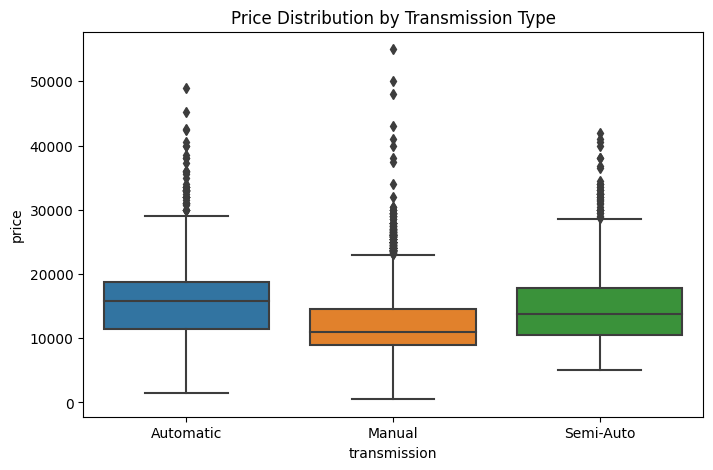

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='transmission', y='price')
plt.title('Price Distribution by Transmission Type')
plt.show()

In [32]:
#ANOVA for checking significance of transmission 
#Null Hypothesis (H₀): All transmission types have same average car price
#Alternative Hypothesis (H₁): At least one transmission type has a different average car price

from scipy.stats import f_oneway

manual_prices = df[df['transmission'] == 'Manual']['price']
auto_prices = df[df['transmission'] == 'Automatic']['price']
semi_auto_prices = df[df['transmission'] == 'Semi-Auto']['price']

f_stat, p_val = f_oneway(manual_prices, auto_prices, semi_auto_prices)
print(f"ANOVA F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 655.9557, p-value: 0.0000


Transmission type does affect car price significantly

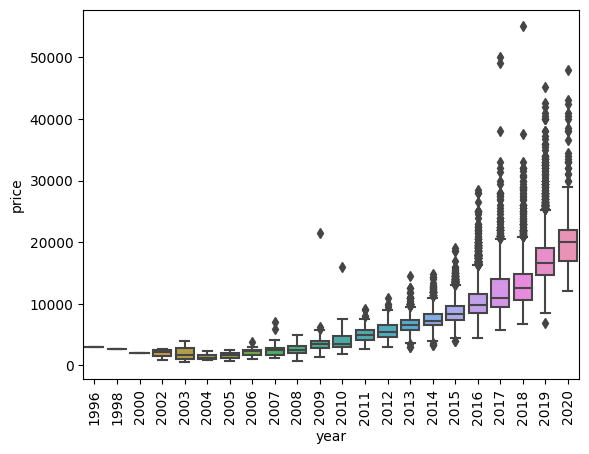

In [33]:
#checking relation between price and year
sns.boxplot(data=df,x='year',y='price')
plt.xticks(rotation=90)
plt.show()

newer car -> more price

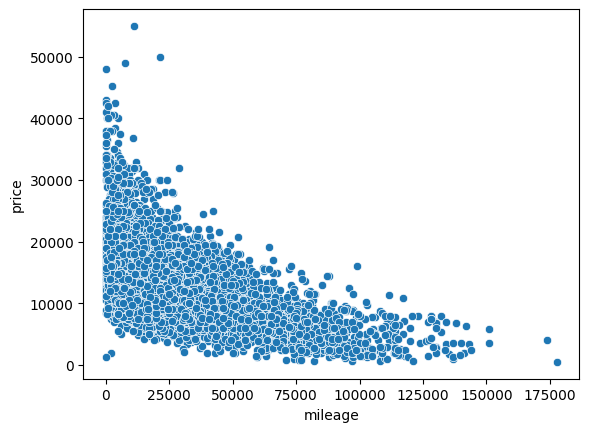

In [34]:
#checking relation between mileage and price
sns.scatterplot(data = df,x='mileage',y='price')
plt.show()

Sort of negative relation 

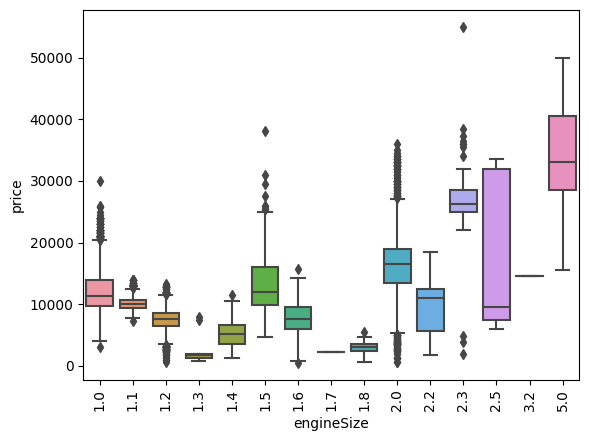

In [35]:
#checking relation of engineSize and price
sns.boxplot(data=df,x='engineSize',y='price')
plt.xticks(rotation=90)
plt.show()

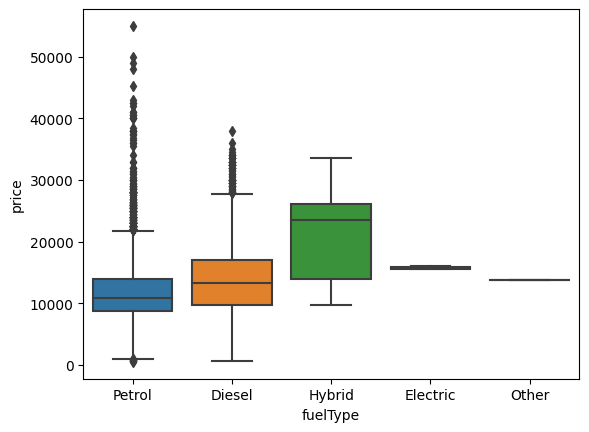

In [36]:
#checking relation between fueltype and price
sns.boxplot(data = df, x = 'fuelType',y = 'price')
plt.show()

<Axes: xlabel='mpg', ylabel='price'>

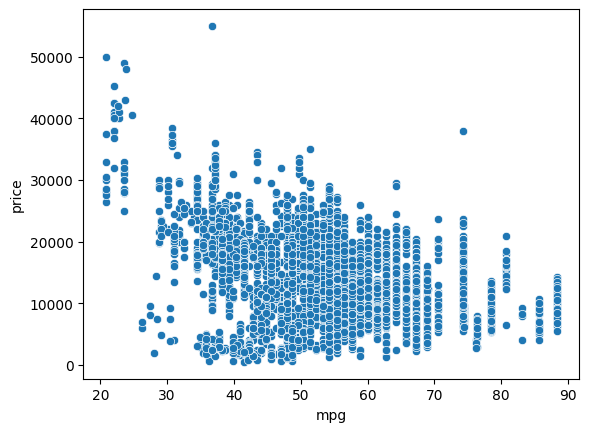

In [37]:
#check relation between mpg and price
sns.scatterplot(data = df,x = 'mpg',y = 'price')

In [38]:
df.groupby('fuelType')['mpg'].mean().reset_index()

,fuelType,mpg
0,Diesel,62.232662
1,Electric,67.300000
2,Hybrid,54.204545
3,Other,67.300000
4,Petrol,55.803457


Electric and Diesel cars show higher average mpg. But electric cars might also cost less due to subsidies or smaller body types.

In [39]:
df.groupby('transmission')['mpg'].mean().reset_index()

,transmission,mpg
0,Automatic,49.263456
1,Manual,59.122677
2,Semi-Auto,50.680313


Manual transmission tends to offer higher fuel efficiency (mpg). Automatic cars are generally more premium and less efficient.

In [40]:
df.groupby('engineSize')['mpg'].mean().reset_index()

,engineSize,mpg
0,1.0,59.631667
1,1.1,60.262791
2,1.2,54.051895
3,1.3,45.653846
4,1.4,50.627928
5,1.5,62.789717
6,1.6,52.889382
7,1.7,38.200000
8,1.8,44.340000
9,2.0,53.121860


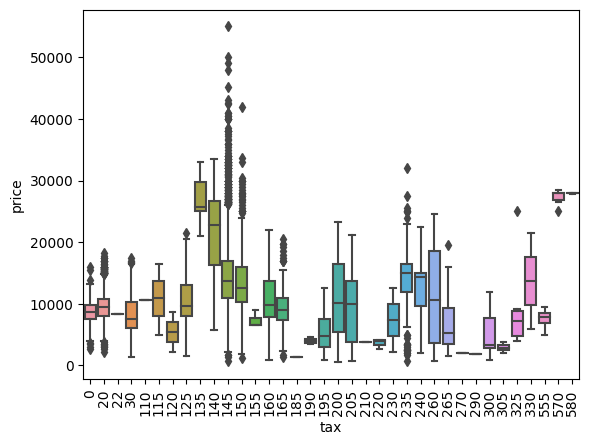

In [41]:
#relation between tax and price
sns.boxplot(data = df,x = 'tax',y = 'price')
plt.xticks(rotation = 90)
plt.show()

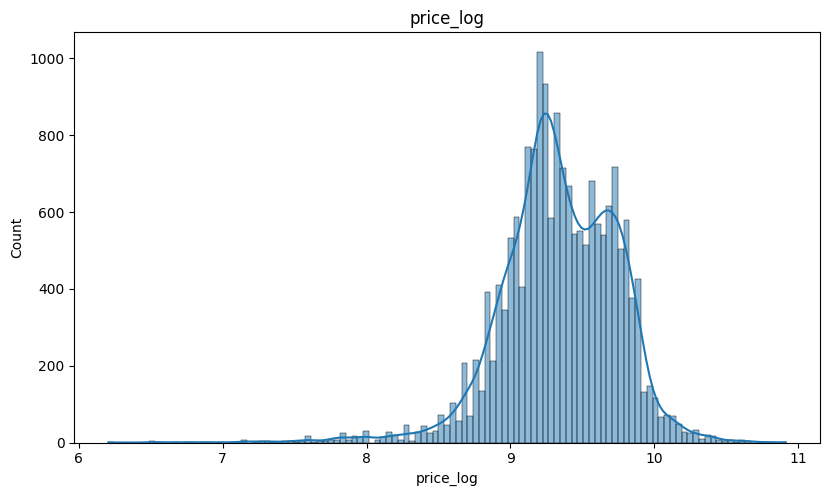

In [42]:
#transforming distributions for normalisation
#price -> right skewed
#mileage -> right skewed 

#log transformation
df['price_log'] = np.log(df['price'])

plt.figure(figsize=(16,14))
distplot('price_log',1)

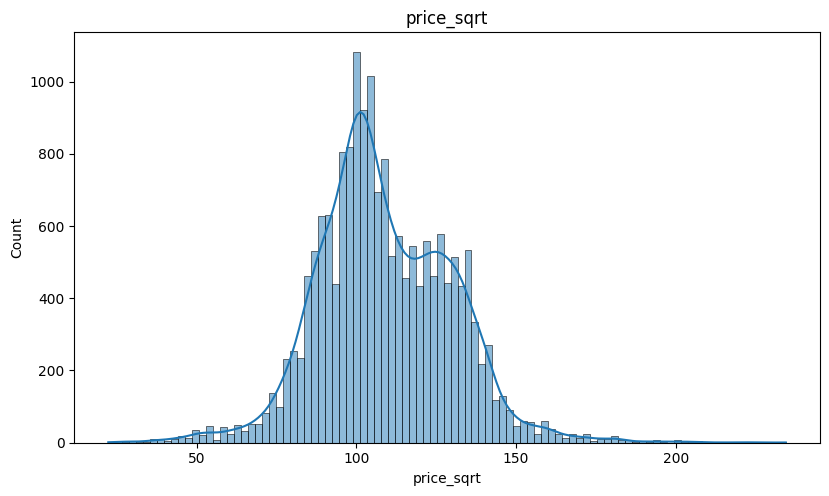

In [43]:
#sqrt tranformation
df['price_sqrt'] = np.sqrt(df['price'])
plt.figure(figsize=(16,14))
distplot('price_sqrt',1)
plt.show()

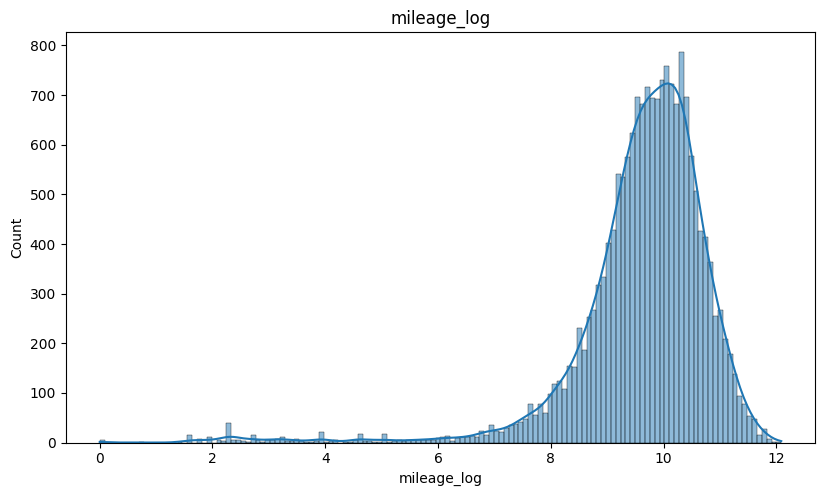

In [44]:
#log tranformation on mileage
df['mileage_log'] = np.log(df['mileage'])
plt.figure(figsize=(16,14))
distplot('mileage_log',1)
plt.show()

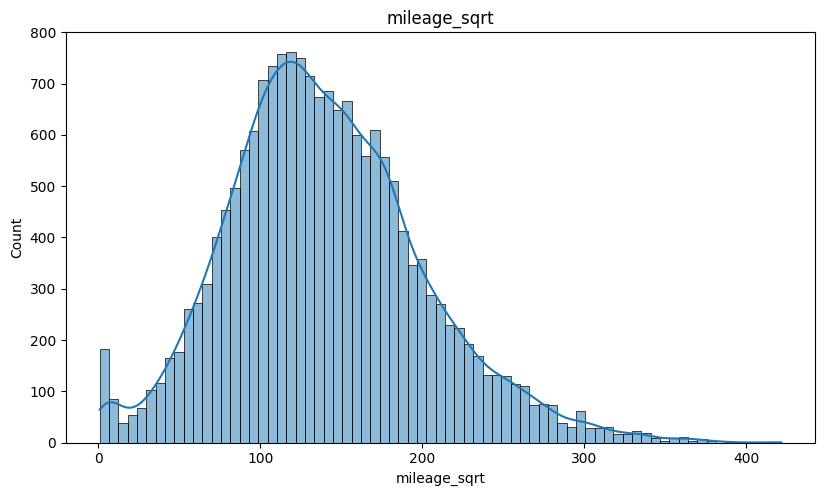

In [45]:
#sqrt tranformation on mileage
df['mileage_sqrt'] = np.sqrt(df['mileage'])
plt.figure(figsize=(16,14))
distplot('mileage_sqrt',1)
plt.show()

In [46]:
#function for boxplot
def boxplot(col, ax):
    sns.boxplot(data=df, x=col, ax=ax)
    ax.set_title(f'{col}', fontsize=12)
    ax.grid(True)

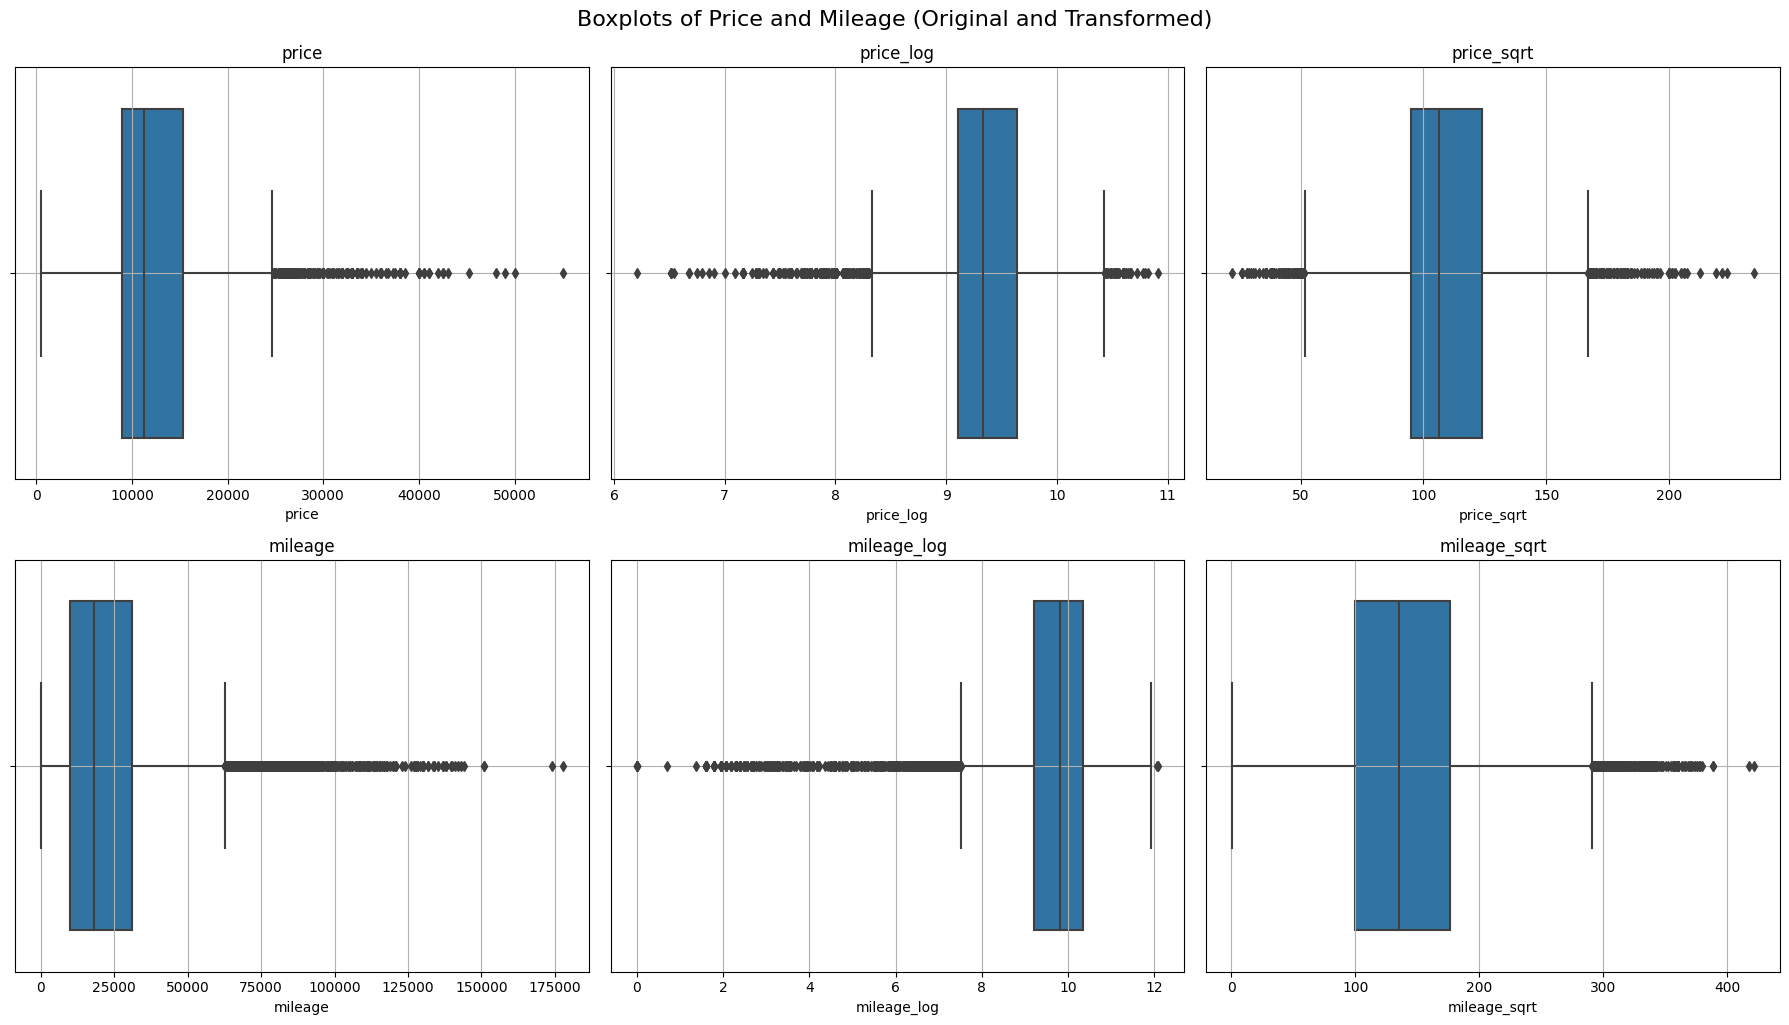

In [47]:
# List of columns to plot
cols = ['price', 'price_log', 'price_sqrt', 'mileage', 'mileage_log', 'mileage_sqrt']

# Set up a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  
axes = axes.flatten()

# Generate each boxplot
for i, col in enumerate(cols):
    boxplot(col, axes[i])

# Adjust layout
plt.tight_layout()
plt.suptitle('Boxplots of Price and Mileage (Original and Transformed)', fontsize=16, y=1.02)
plt.show()

better to use sqrt transformation

In [48]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'price_log', 'price_sqrt', 'mileage_log',
       'mileage_sqrt'],
      dtype='object')

# Data Split

In [49]:
final_feature = ['model','year','transmission','mileage_sqrt','fuelType','tax','mpg','engineSize']

X = df[final_feature]
y = df['price_sqrt']

In [50]:
X = pd.get_dummies(X,drop_first = True)
encoded_cols = X.select_dtypes(include='bool').columns.to_list()
X[encoded_cols] = X[encoded_cols].astype('int')
X

,year,mileage_sqrt,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,126.269553,150,57.7,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,95.304774,150,57.7,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,111.606451,150,57.7,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,102.274141,145,40.3,1.5,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,38.496753,145,48.7,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17960,2017,129.228480,150,47.1,1.4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17961,2014,201.742410,30,57.7,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2015,83.725743,20,67.3,1.6,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17963,2018,70.760158,145,57.7,1.2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train

,year,mileage_sqrt,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
4032,2020,3.162278,145,55.4,1.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
16054,2015,241.244689,30,64.2,1.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17266,2011,271.624741,200,40.9,1.6,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
15479,2016,130.575649,125,54.3,1.2,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1575,2018,140.189158,145,41.5,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2018,97.979590,145,54.3,1.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11964,2018,118.059307,145,41.5,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5390,2018,125.115946,145,74.3,1.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
860,2017,163.288089,145,54.3,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
X_test

,year,mileage_sqrt,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
17609,2017,63.245553,160,44.8,1.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7076,2017,170.352576,150,65.7,1.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1713,2015,214.837148,20,67.3,1.6,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1611,2013,207.451199,30,55.4,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
16830,2009,281.069386,200,48.7,1.8,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6962,2018,118.848643,145,57.7,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7731,2019,94.154129,145,58.9,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11655,2018,119.050409,145,58.9,1.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
10536,2020,47.042534,135,47.9,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
y_train

4032     140.420796
16054     97.462813
17266     74.060786
15479     92.736185
1575     134.123078
            ...    
11284    122.061460
11964    135.996323
5390     109.316056
860      126.483200
15795     98.488578
Name: price_sqrt, Length: 14372, dtype: float64

In [55]:
y_test

17609    111.781036
7076      94.863059
1713      89.431538
1611      74.101282
16830     61.562976
            ...    
6962     116.167982
7731     148.323970
11655    117.042727
10536    158.047461
11885    102.469508
Name: price_sqrt, Length: 3593, dtype: float64

In [56]:
#data standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = ['year', 'mileage_sqrt', 'tax', 'mpg', 'engineSize']
X_train.loc[:,num_cols] = scaler.fit_transform(X_train.loc[:,num_cols])
X_test.loc[:,num_cols] = scaler.transform(X_test.loc[:,num_cols])

# Model Preparation

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import numpy as np


models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(kernel="rbf"),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42, objective="reg:squarederror")
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "R2 Score": r2}

# Select best model based on R²
best_model_name = max(results, key=lambda x: results[x]["R2 Score"])
best_model = models[best_model_name]

print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}: RMSE = {metrics['RMSE']:.4f}, R2 = {metrics['R2 Score']:.4f}")

print(f"\n Best Model: {best_model_name} with R² = {results[best_model_name]['R2 Score']:.4f}")

Model Performance:
Linear Regression: RMSE = 6.9472, R2 = 0.8929
Support Vector Regressor: RMSE = 6.8336, R2 = 0.8964
Random Forest: RMSE = 5.3111, R2 = 0.9374
Gradient Boosting: RMSE = 5.7927, R2 = 0.9256
XGBoost: RMSE = 4.8589, R2 = 0.9476

 Best Model: XGBoost with R² = 0.9476


In [58]:
#checking cross-validation score for best model
from sklearn.model_selection import cross_val_score, KFold
model = xgb.XGBRegressor(n_estimators=100, random_state=42, objective="reg:squarederror")
kf = KFold(n_splits=5, shuffle=True, random_state=42)

neg_mse_scores = cross_val_score(best_model, X_train, y_train, scoring="neg_mean_squared_error", cv=kf)
r2_scores = cross_val_score(best_model, X_train, y_train, scoring="r2", cv=kf)

rmse_scores = np.sqrt(-neg_mse_scores)

print("Cross-Validation Results (5-fold):")
print(f"RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean():.4f}")
print(f"R² Scores: {r2_scores}")
print(f"Mean R²: {r2_scores.mean():.4f}")

Cross-Validation Results (5-fold):
RMSE Scores: [4.89137736 5.33403451 4.82615624 4.85594951 4.97585693]
Mean RMSE: 4.9767
R² Scores: [0.94535136 0.93704217 0.94590636 0.9461261  0.94303191]
Mean R²: 0.9435


In [59]:
#prediction
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([113.768425,  95.97789 ,  90.800964, ..., 109.89821 , 161.12569 ,
        98.09186 ], dtype=float32)

In [60]:
#actual values
y_test

17609    111.781036
7076      94.863059
1713      89.431538
1611      74.101282
16830     61.562976
            ...    
6962     116.167982
7731     148.323970
11655    117.042727
10536    158.047461
11885    102.469508
Name: price_sqrt, Length: 3593, dtype: float64

In [61]:
#model evaluation
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)


0.9476274581622962


In [62]:
# Adjusted R² formula
n = X_test.shape[0]    # number of samples in test set
k = X_test.shape[1]    # number of features (after encoding)

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("Adjusted R²:", adjusted_r2)

Adjusted R²: 0.9471269898029702


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 3.58
MSE: 23.61
RMSE: 4.86
MAPE: 3.41%


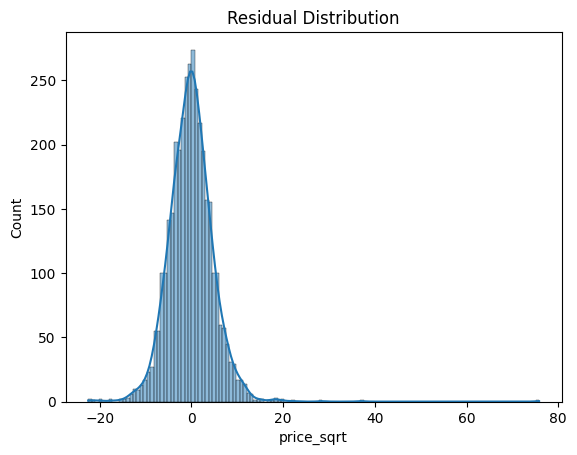

In [64]:
# Residuals
residuals = y_test - y_pred

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()